## Jupyter notebook for the Bioinformatics paper 'Inferring the perturbation time from biological time course data'

In [1]:
library(DEtime)
library(repr)
options(repr.plot.width=8, repr.plot.height=6)
set.seed(1)

### Initializing parameter for the notebook illustration

In [2]:
### Control time points, here the experiments are assumed to be done on noneven time points
ControlTimes <- c(seq(0,30,2), seq(0,30,4))
lc <- length(ControlTimes)  ### length of the control time points

### Perturbed time point. these time points do not have to be the same as ControlTimes. 
### Here it is assumed that two replicates are obtained for perturbed data 
PerturbedTimes <- c(seq(0,30,2), seq(0,30,2))
lp <- length(PerturbedTimes)  ### length of the perturbed time points

### Create an example covariance matrix with no perturbation for illustration purposes

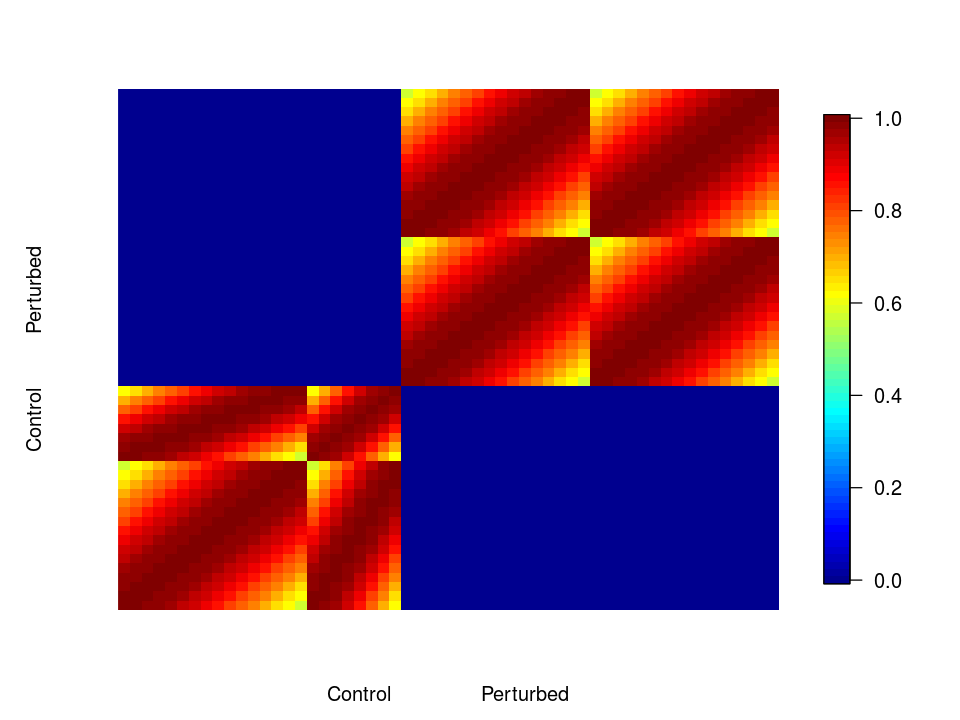

In [3]:
### use default RBF kernel as the basis kernel
alpha = 1.0 ## variance hyperparameter for the RBF kernel
ls = 800.0 ## lengthscale hyperparameter for the RBF kernel
sigman = 0.001 ## nugget noise variance parameter 

### kernel for the perturbation GP model
kern <- list()
K0 <- DEtimeKernParamInit(kern) ## initialize the kernel
K0$inverseWidth <- 1.0/ls
K0$variance <- alpha

K0$xp <- -1000  ## xp is the defined branching point, a very small negative xp indicates two independent GPs

X <- matrix(c(ControlTimes, PerturbedTimes, rep(1,lc),rep(2,lp)), ncol=2)
K <- DEtimeKernCompute(K0,X) ## Generate the DEtime kernel 

#pWidth = 3
#pHeight = 3
#plot.window(c(0,pWidth),c(0,pHeight))
fields::image.plot(K, xlab="Control               Perturbed", ylab="Control         Perturbed", axes=FALSE)


### Create an example covariance matrix with perturbation at the start of the experiments 

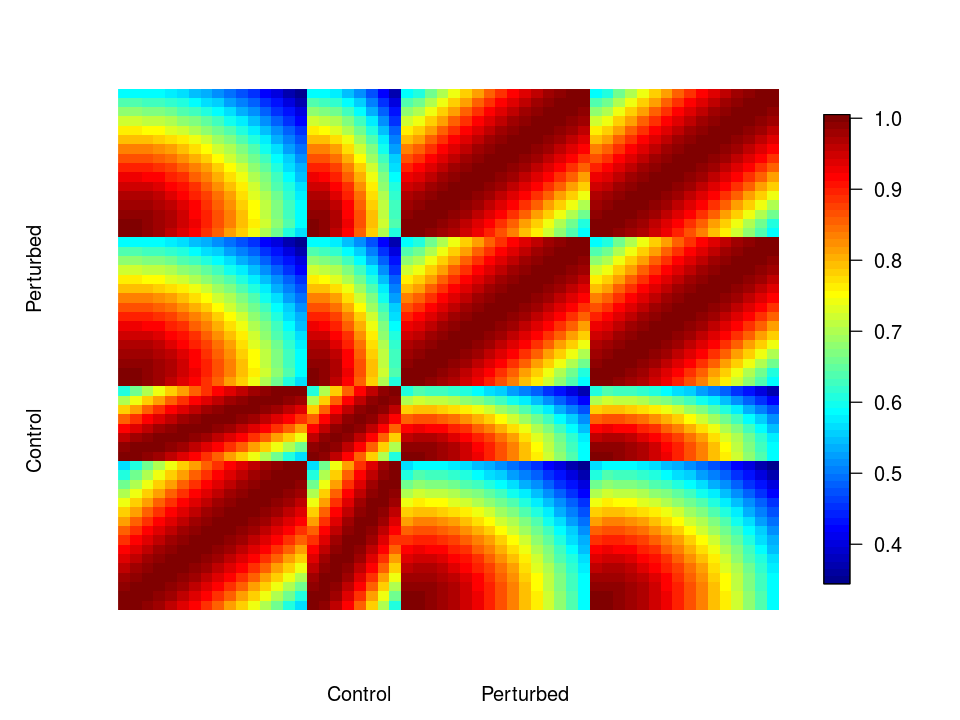

In [4]:
K0$xp <- 1 ### set the perturbation point at just the start of the experiments
K <- DEtimeKernCompute(K0,X) ## Generate the DEtime kernel 

fields::image.plot(K, xlab="Control               Perturbed", ylab="Control                Perturbed", axes=FALSE)

### Move the perturbation to the middle of the time points and see the change in the covariance matrix

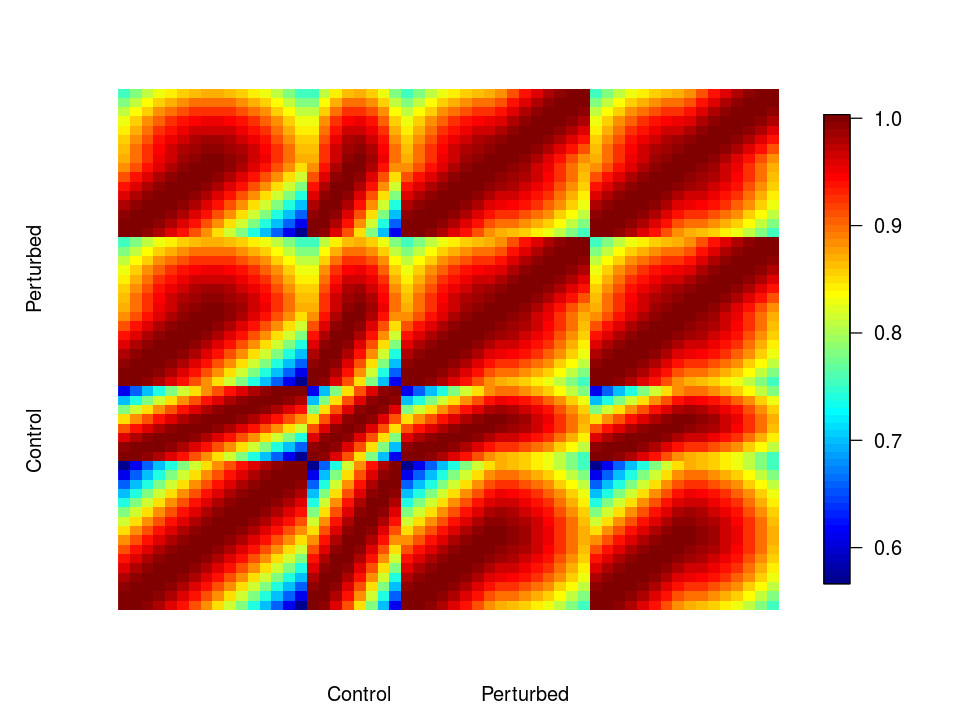

In [5]:
K0$xp <- 15

K <- DEtimeKernCompute(K0, X)
fields::image.plot(K, xlab="Control               Perturbed", ylab="Control                Perturbed", axes=FALSE)


### Generate simulated data to illustration the package

In [8]:

### generate simulated data 
N <- 4
RowSize <- N
ColSize <- lc + lp
BlockSize <- N*ColSize
mu <- rep(0,ColSize)
data_normal_n  <- matrix(, nrow=RowSize, ncol=ColSize)
K0$xp <- 15 ### randomly set a perturbation point
K <- DEtimeKernCompute(K0,X)

### generate the simulation data by multivariate normall random generator
#data_normal_n[1:N,] <- MASS::mvrnorm(N, mu, K + diag(rnorm(ColSize,mean=0,sd=sigman))) + matrix(rnorm(BlockSize,mean=0,sd=sigman),nrow=N)
data_normal_n[1:N,] <- MASS::mvrnorm(N, mu, K + diag(sigman, nrow=ColSize, ncol=ColSize)) 




### Illustrate simulated data

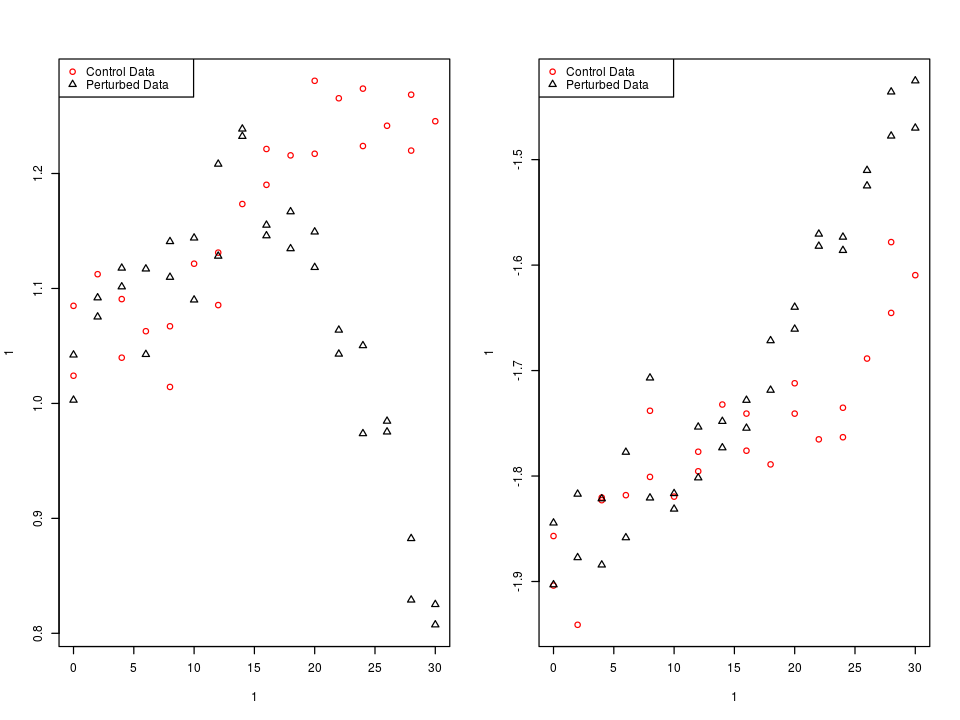

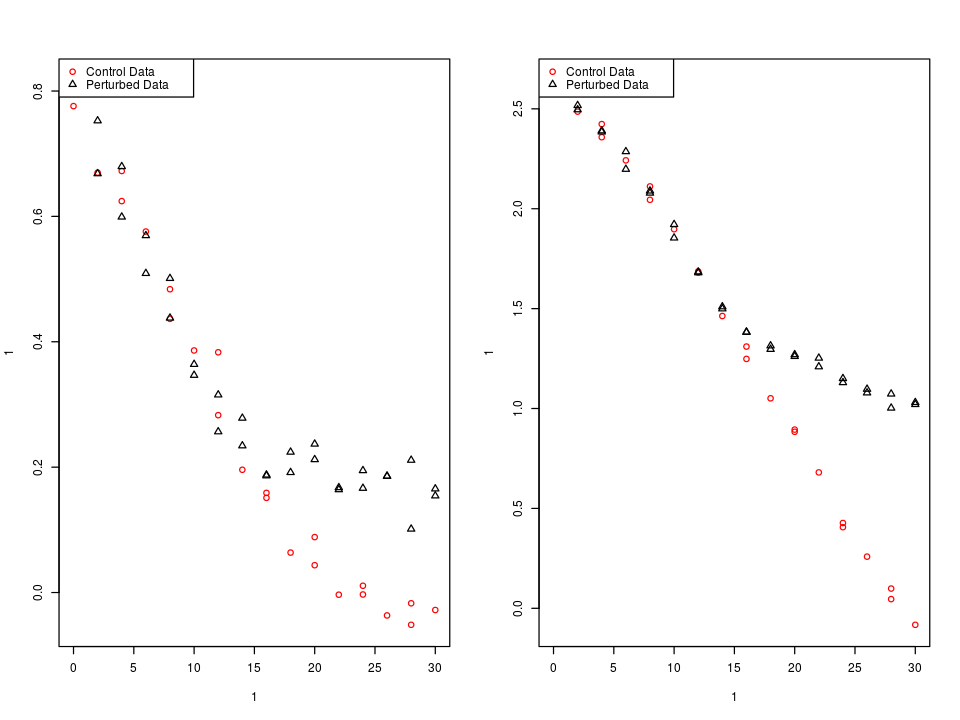

In [9]:

ControlData <- data_normal_n[1:N,1:lc]
PerturbedData <- data_normal_n[1:N,(lc+1):(lc+lp)]

dim(ControlData) <- c(N,lc)
dim(PerturbedData) <- c(N,lp)  

par(mfrow = c(1, 2))
par(cex = 0.6)

xlim = range(c(ControlTimes,PerturbedTimes))
ylim = range(c(ControlData,PerturbedData))
for (i in 1:N) {
    plot(1, 1, xlim = xlim, ylim = range(c(ControlData[i,],PerturbedData[i,])), type = "n")
    points(ControlTimes,ControlData[i,],col='red', pch=1)
    points(PerturbedTimes,PerturbedData[i,],col='black',pch=2, xlab='times',ylab='sampled data')
    legend("topleft", legend = c("Control Data", "Perturbed Data"), pch = c(1, 2), col = c('red', 'black'))
}

### Use DEtime_infer function to estimate the perturbation time point

In [10]:

res <- DEtime_infer(ControlTimes= ControlTimes, ControlData = ControlData, PerturbedTimes = PerturbedTimes, PerturbedData = PerturbedData)


ControlData is accepted
PerturbedData is accepted
gene IDs are not provided. Numbers are used instead.
Testing perturbation time points are not provided. Default one is used.
gene 1 is done
gene 2 is done
gene 3 is done
gene 4 is done
DEtime inference is done.
Please use print_DEtime or plot_DEtime to view the results.


### print the results by print_DEtime function

In [11]:
print_DEtime(res)

Perturbation point inference results from DEtime package: 
  gene_ID   MAP   mean median  ptl5 ptl95
1       1 14.08  7.189  6.122 0.000 15.31
2       2 14.69 11.168 11.633 4.898 15.92
3       3 15.31 13.471 14.082 6.735 15.92
4       4 14.69 13.310 14.082 9.184 15.31


### Plot the GP fitting results 

All genes will be plotted 
1 is plotted
2 is plotted


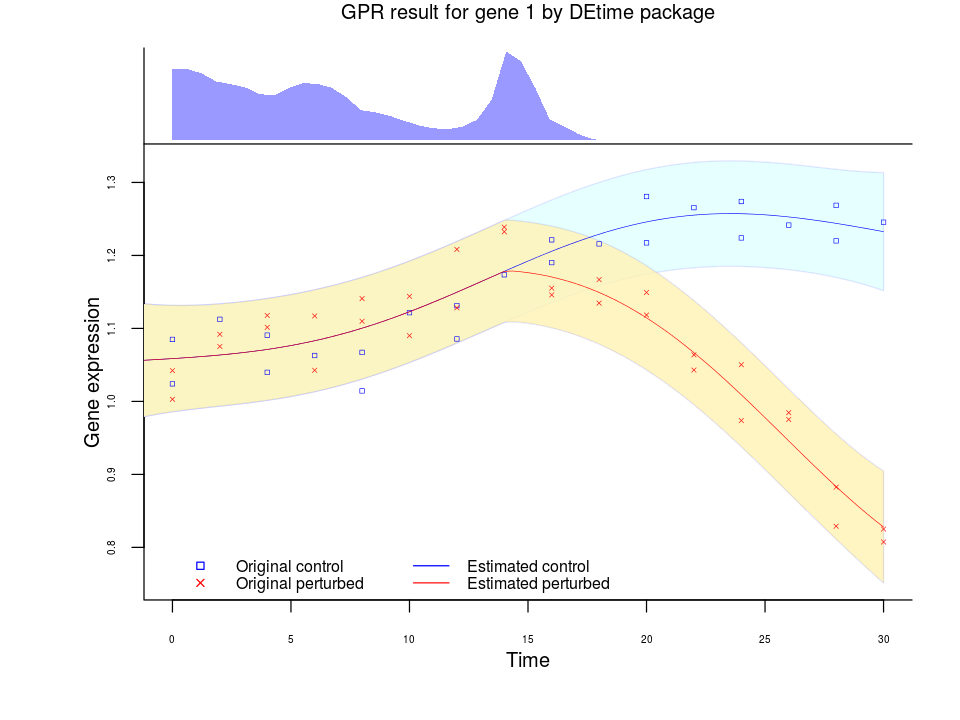

3 is plotted


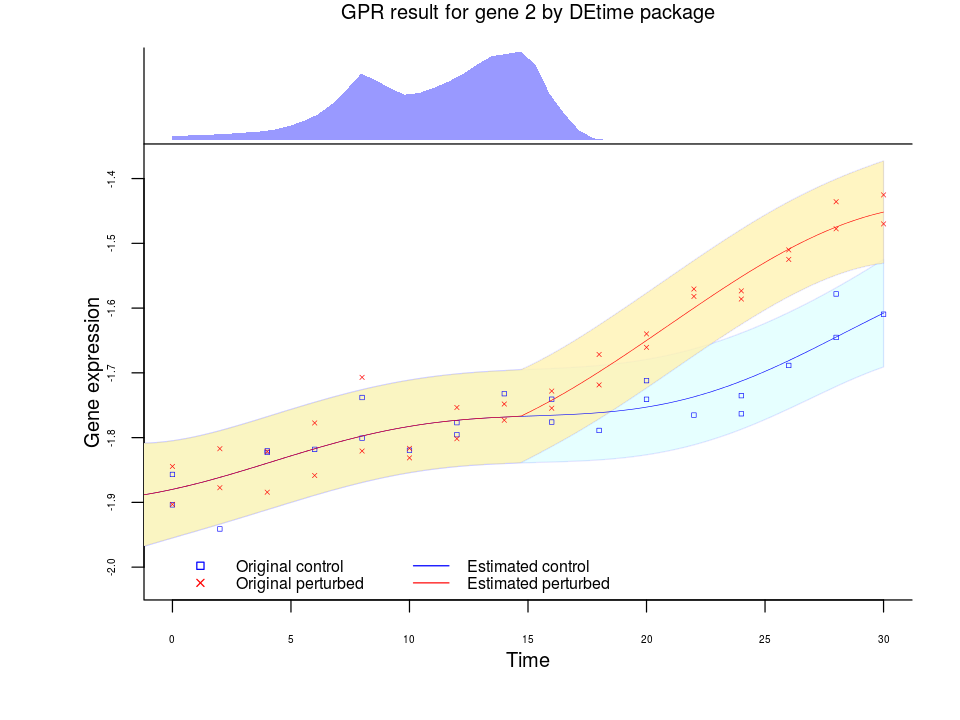

4 is plotted


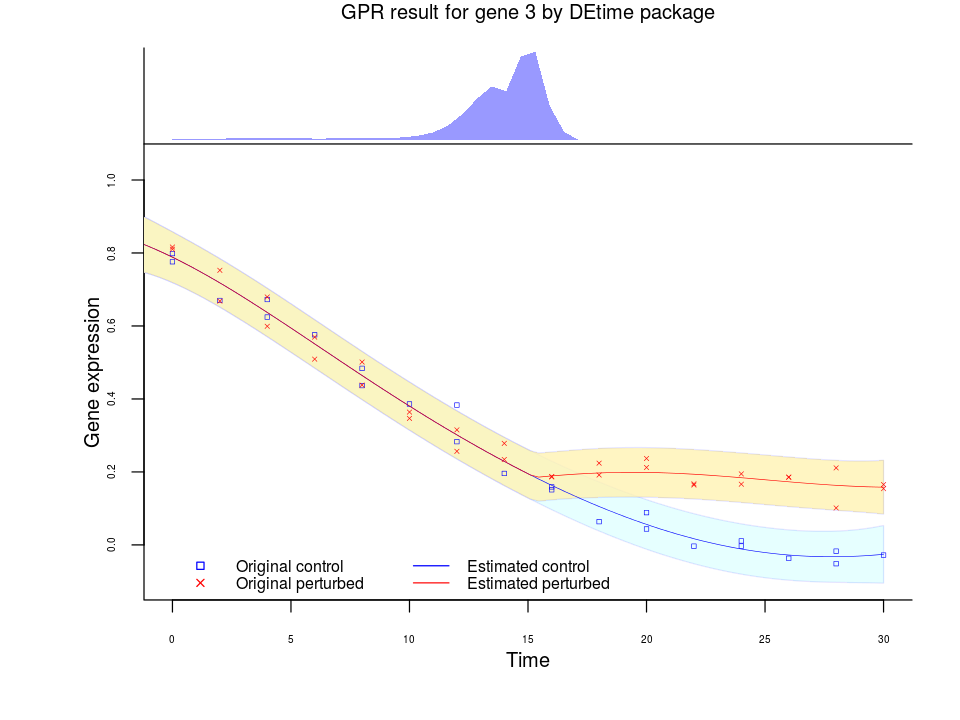

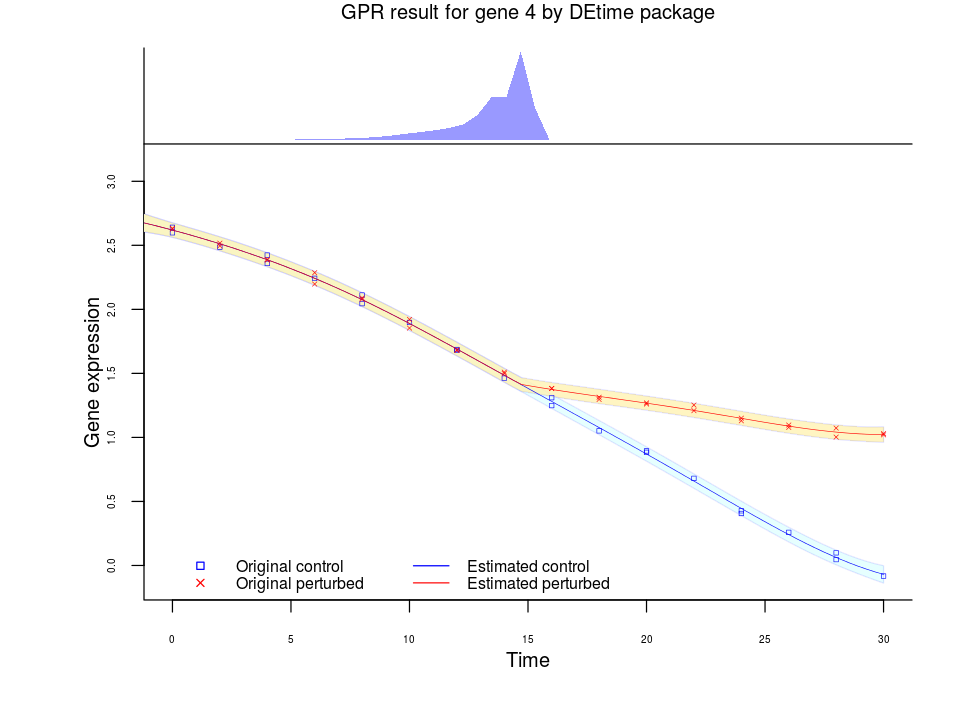

In [12]:
plot_DEtime(res)